In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import multiprocess

In [2]:
#have a way to input a list, to go gather all the summary info for those things --done
#plot all the things for everything in the output from previous file
file1 = '../short_summaries_results/TransPi.tsv'
file2 = '../short_summaries_results/Trinity.tsv'
file_list = '../short_file_list.txt'
TransPi = pd.read_csv(file1, sep='\t', index_col='species_name')
Trinity = pd.read_csv(file2, sep='\t', index_col='species_name')
# print(TransPi)
# print(Trinity)

In [3]:
#Filter to only desired list
filter_list = []
with open(file_list, 'r') as f_list:
    for line in f_list:
        filter_list.append(line.strip())
print(filter_list)
print(TransPi.columns)
print(Trinity.columns)

# TransPi = TransPi.loc[filter_list]
# Trinity = Trinity.loc[filter_list]

print((TransPi['Total'] > 954).any())
print((Trinity['Total'] > 954).any())
TransPi = TransPi.drop(columns=['Total'])
Trinity = Trinity.drop(columns=['Total'])

#TODO order both by index?
TransPi = TransPi.sort_index()
Trinity = Trinity.sort_index()

['Acropora_aculeus', 'Acropora_cervicornis', 'Acropora_digitifera', 'Hormiphora_californensis', 'Plakina_jani', 'Erenna_richardi', 'Bargmannia_amoena']
Index(['Complete_BUSCOs', 'Complete_&_single-copy', 'Complete_&_duplicated',
       'Fragmented', 'Missing', 'Total'],
      dtype='object')
Index(['Complete_BUSCOs', 'Complete_&_single-copy', 'Complete_&_duplicated',
       'Fragmented', 'Missing', 'Total'],
      dtype='object')
False
False


# TransPi Stacked Barplot

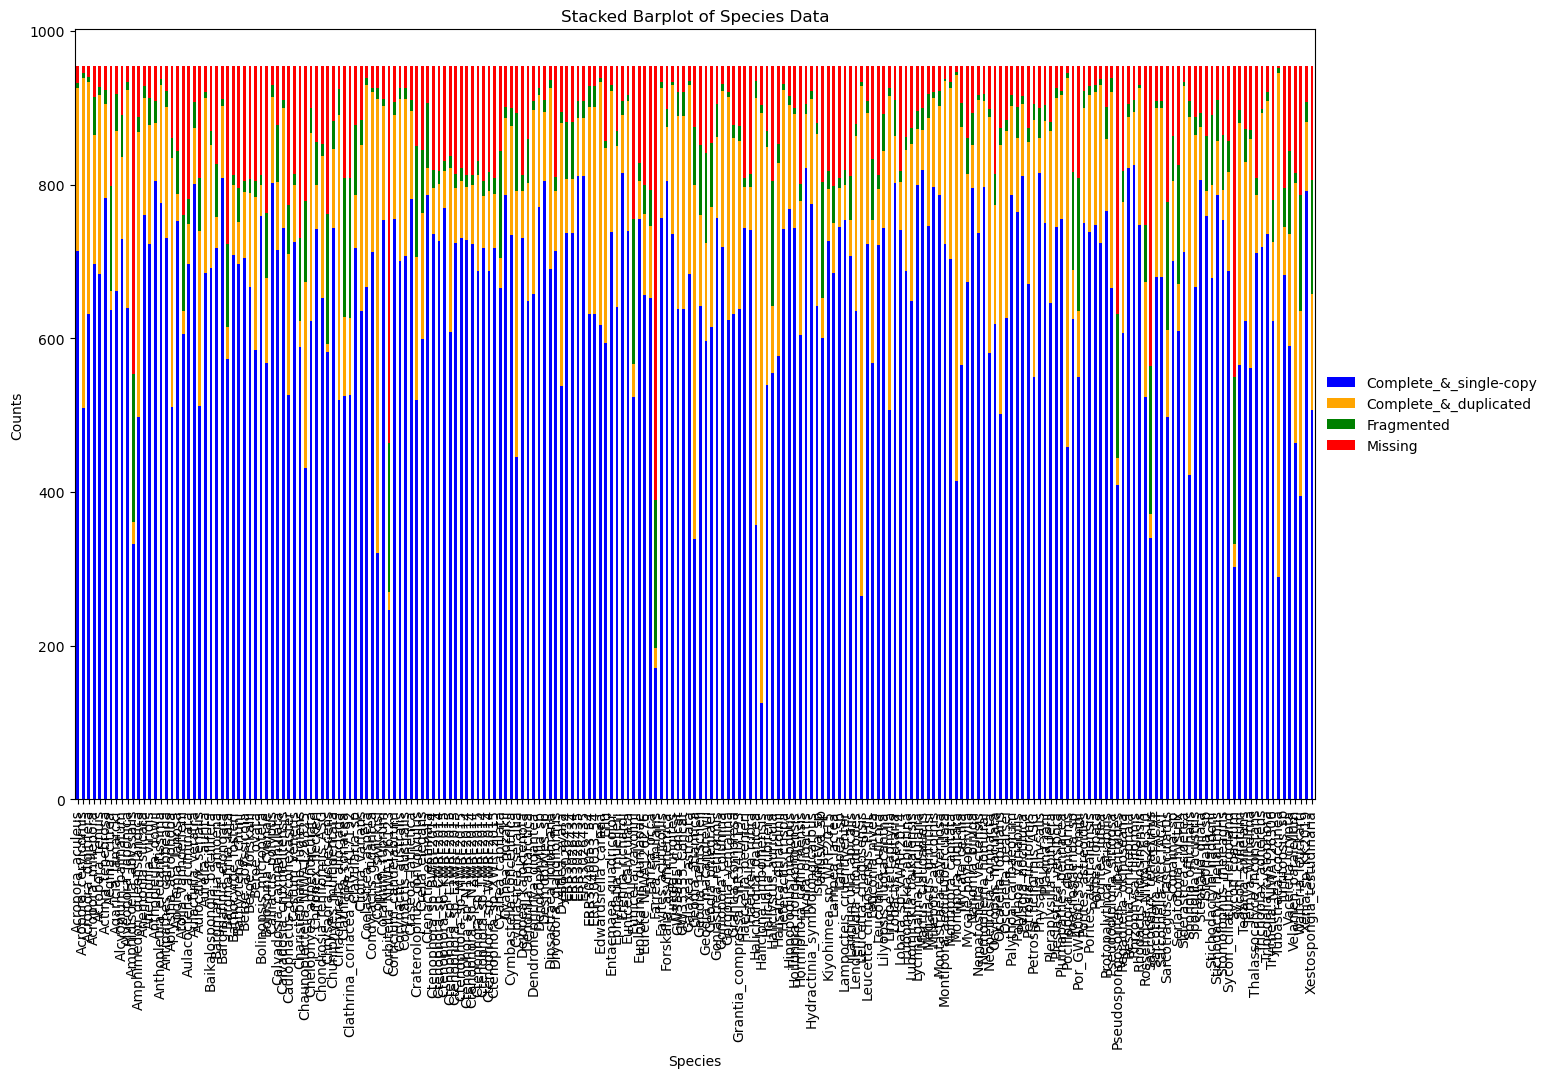

In [4]:
#Plot the stacked barplot
TransPi_subset = TransPi.drop(columns=['Complete_BUSCOs'])
colors = ['blue', 'orange', 'green', 'red', 'violet']
ax = TransPi_subset.plot(kind='bar', stacked=True, figsize=(16, 10), color=colors)
plt.title('Stacked Barplot of Species Data')
plt.xlabel('Species')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)

# Show the plot
plt.show()

# Trinity Stacked Barplot

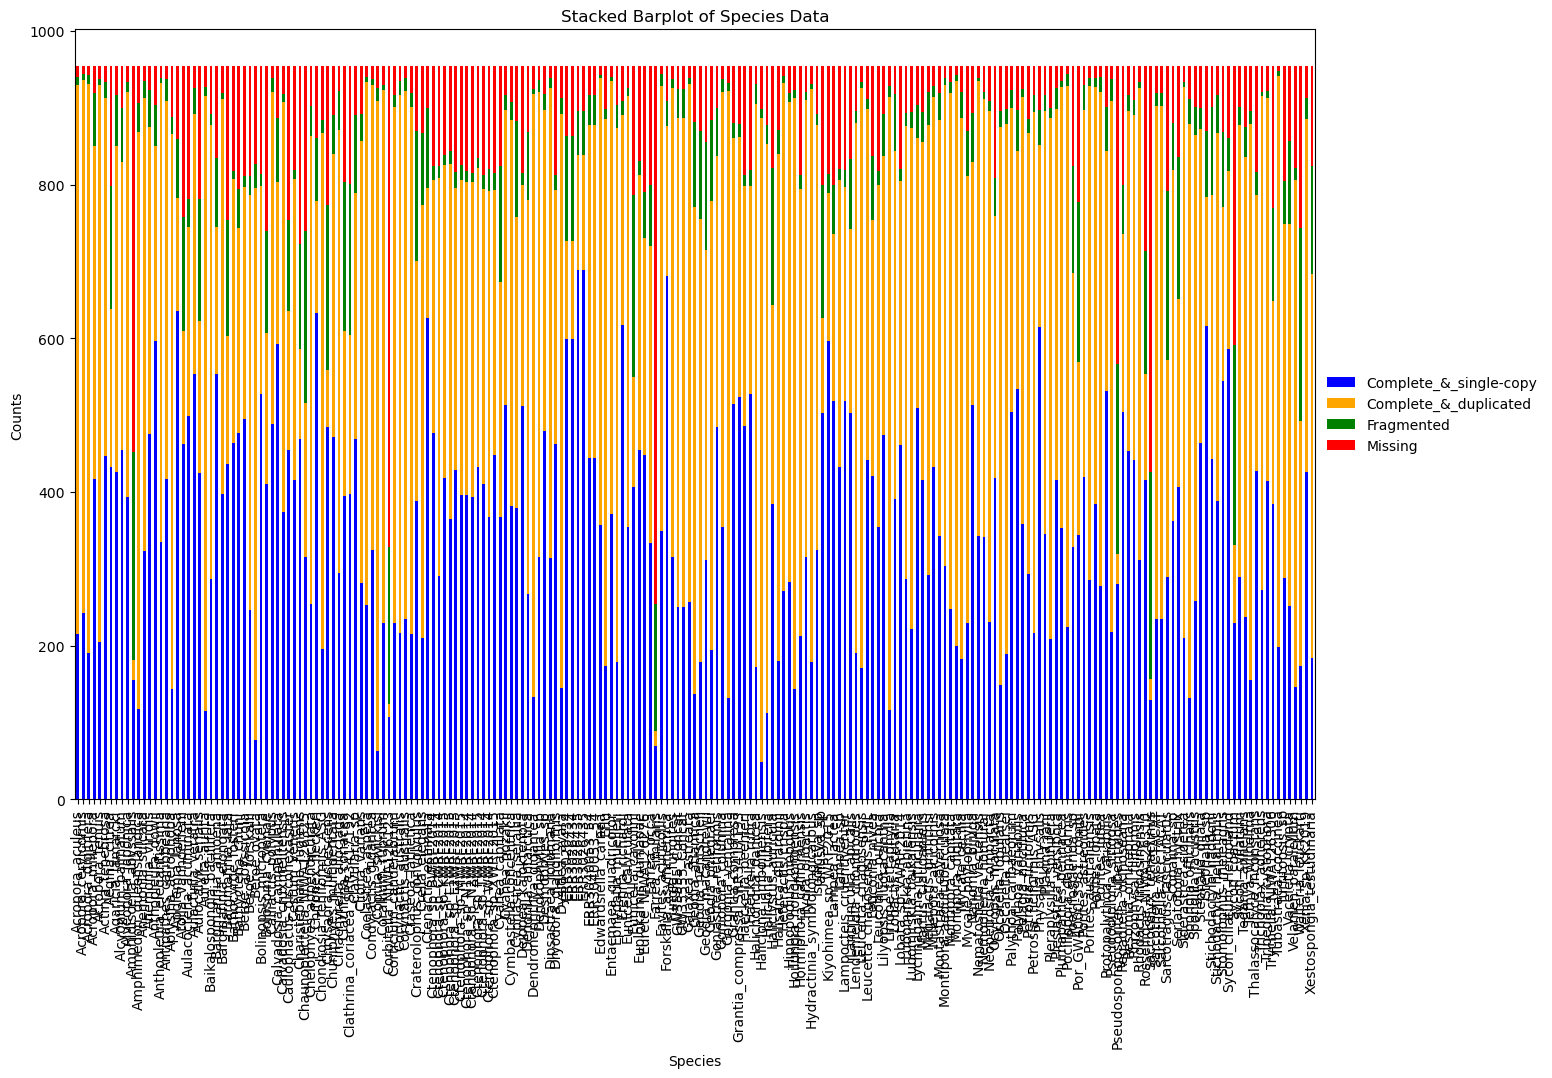

In [5]:
#Plot the stacked barplot
Trinity_subset = Trinity.drop(columns=['Complete_BUSCOs'])
colors = ['blue', 'orange', 'green', 'red', 'violet']
ax = Trinity_subset.plot(kind='bar', stacked=True, figsize=(16, 10), color=colors)
plt.title('Stacked Barplot of Species Data')
plt.xlabel('Species')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)

# Show the plot
plt.show()

# Plot side by side

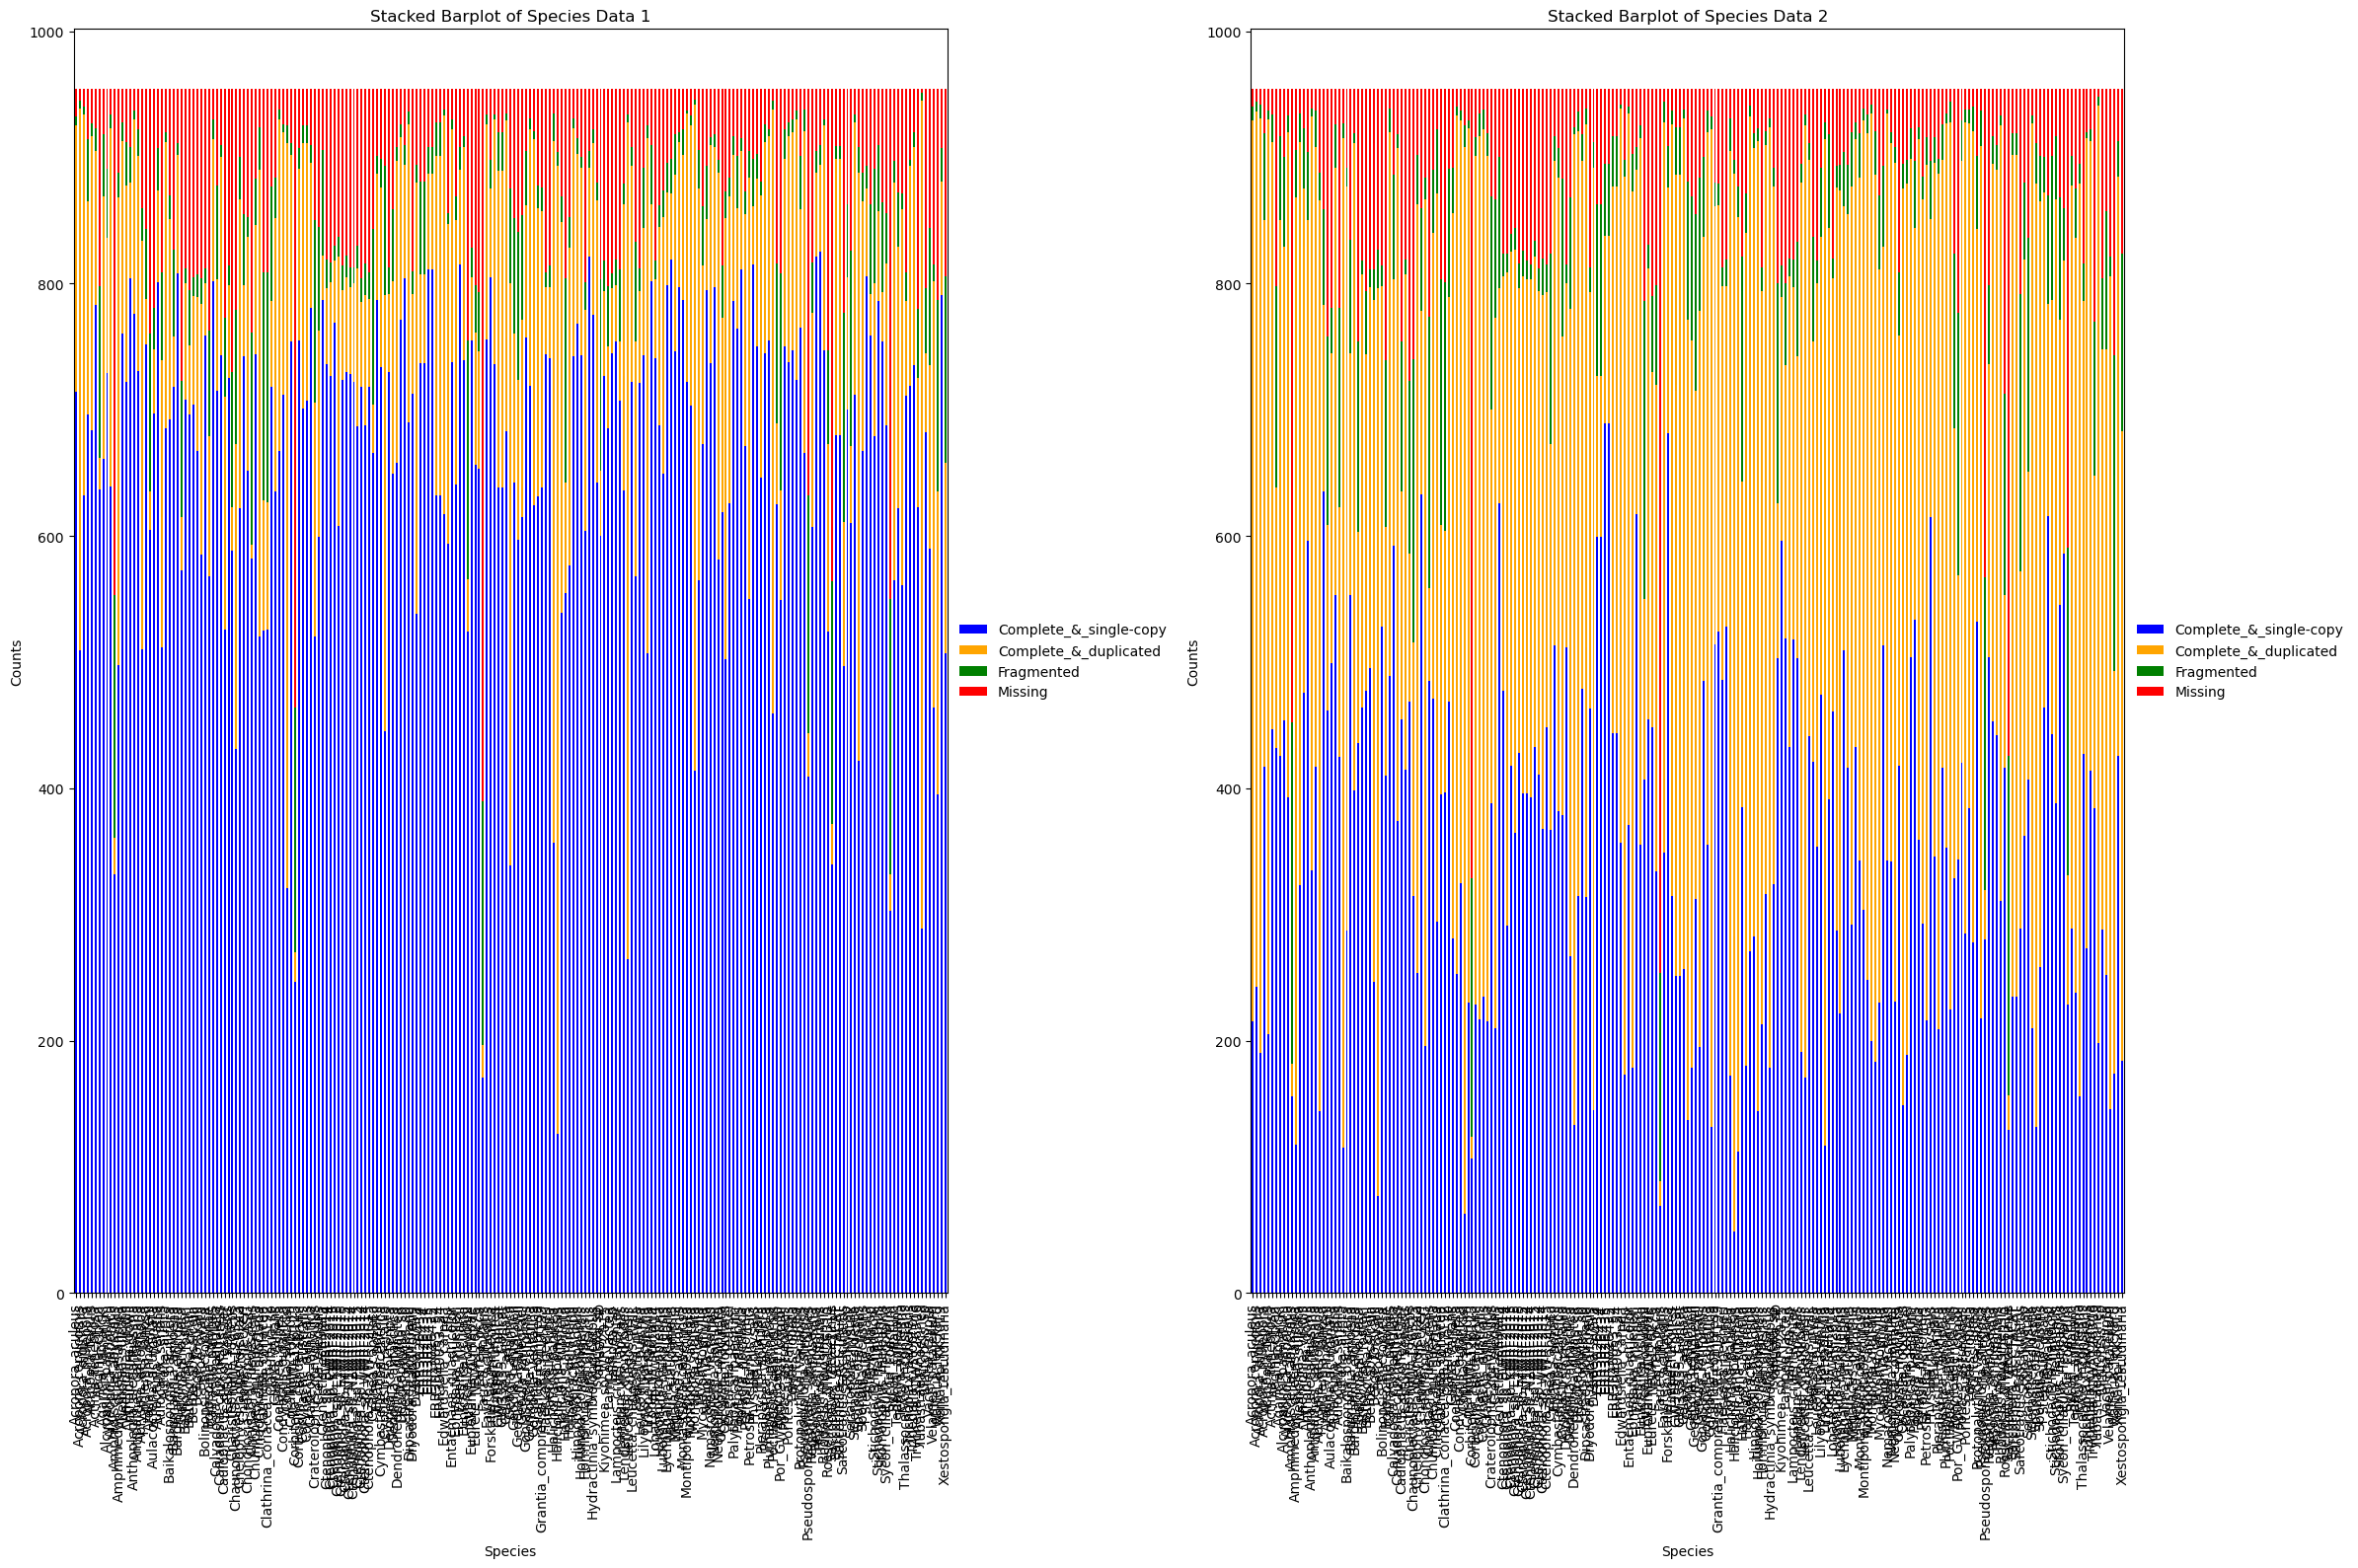

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(24, 16))
colors = ['blue', 'orange', 'green', 'red', 'violet']


TransPi_subset.plot(kind='bar', stacked=True, color=colors, ax=axs[0])
axs[0].set_title('Stacked Barplot of Species Data 1')
axs[0].set_xlabel('Species')
axs[0].set_ylabel('Counts')
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)

# Plot the second stacked barplot
Trinity_subset.plot(kind='bar', stacked=True, color=colors, ax=axs[1])
axs[1].set_title('Stacked Barplot of Species Data 2')
axs[1].set_xlabel('Species')
axs[1].set_ylabel('Counts')
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# TransPi Stacked Area Plot

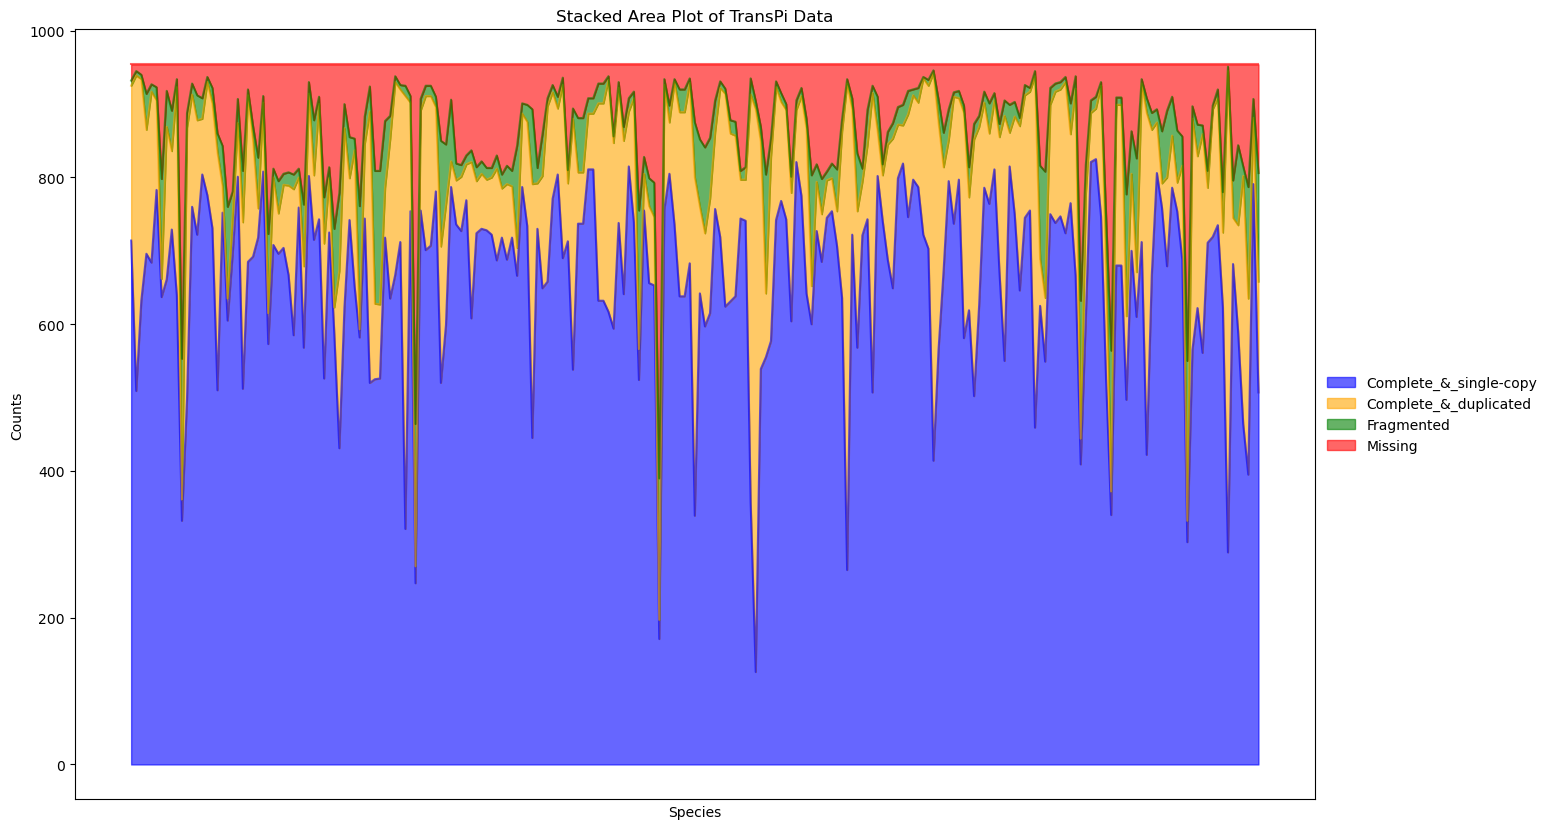

In [23]:
ax = TransPi_subset.plot(kind='area', stacked=True, figsize=(16, 10), color=colors, alpha=0.6)

# Customize the plot
plt.title('Stacked Area Plot of TransPi Data')
plt.xlabel('Species')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)
ax.set_xticks([])
ax.set_xticklabels([])

# Show the plot
plt.show()

# Trinity Stacked Area Plot

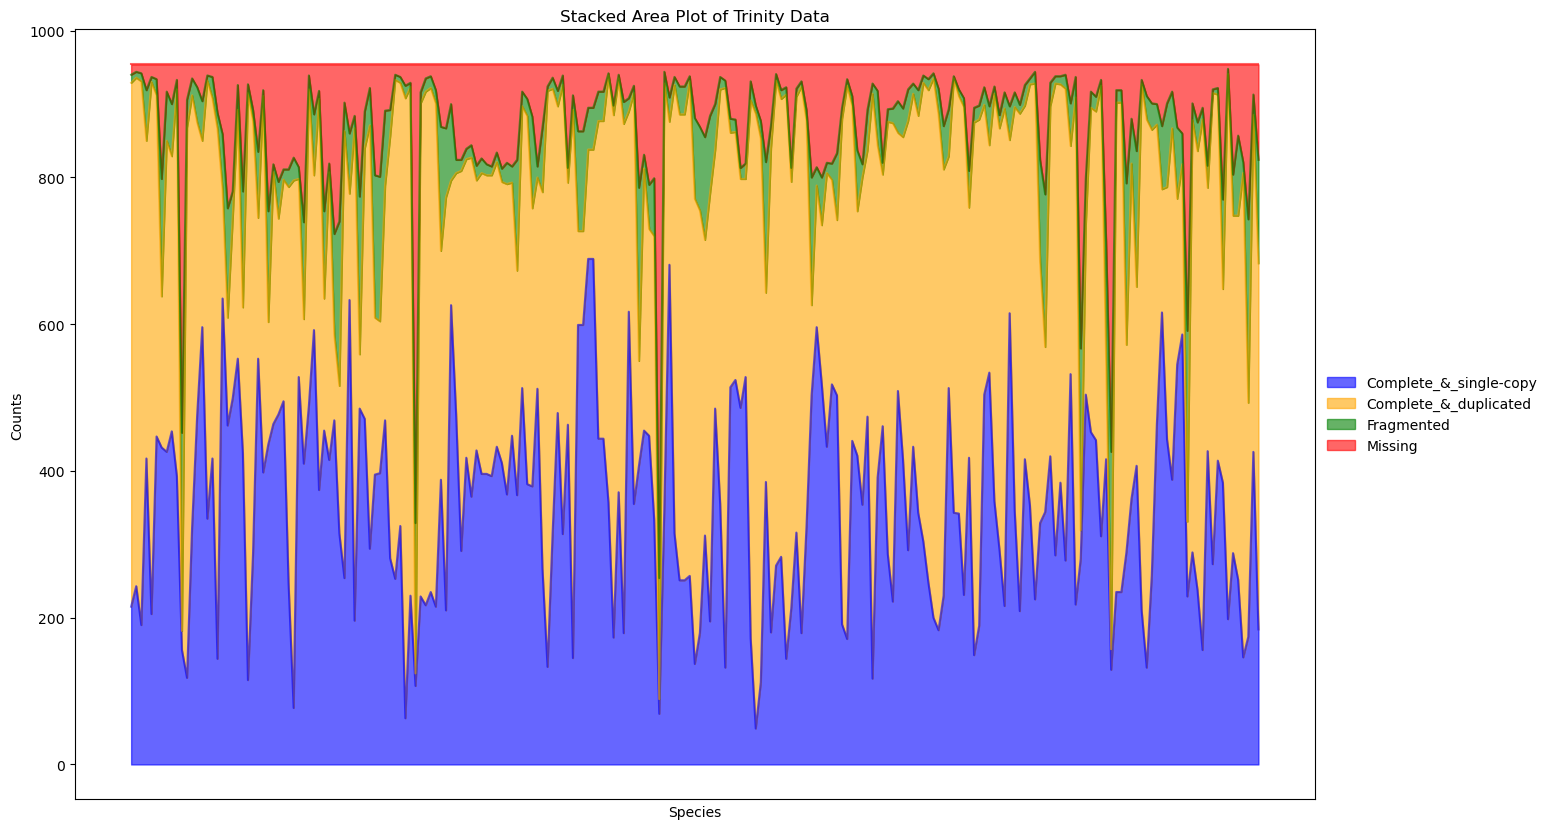

In [22]:
ax = Trinity_subset.plot(kind='area', stacked=True, figsize=(16, 10), color=colors, alpha=0.6)

# Customize the plot
plt.title('Stacked Area Plot of Trinity Data')
plt.xlabel('Species')
plt.ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)
ax.set_xticks([])
ax.set_xticklabels([])

# Show the plot
plt.show()

# Combined Stacked Area Plots

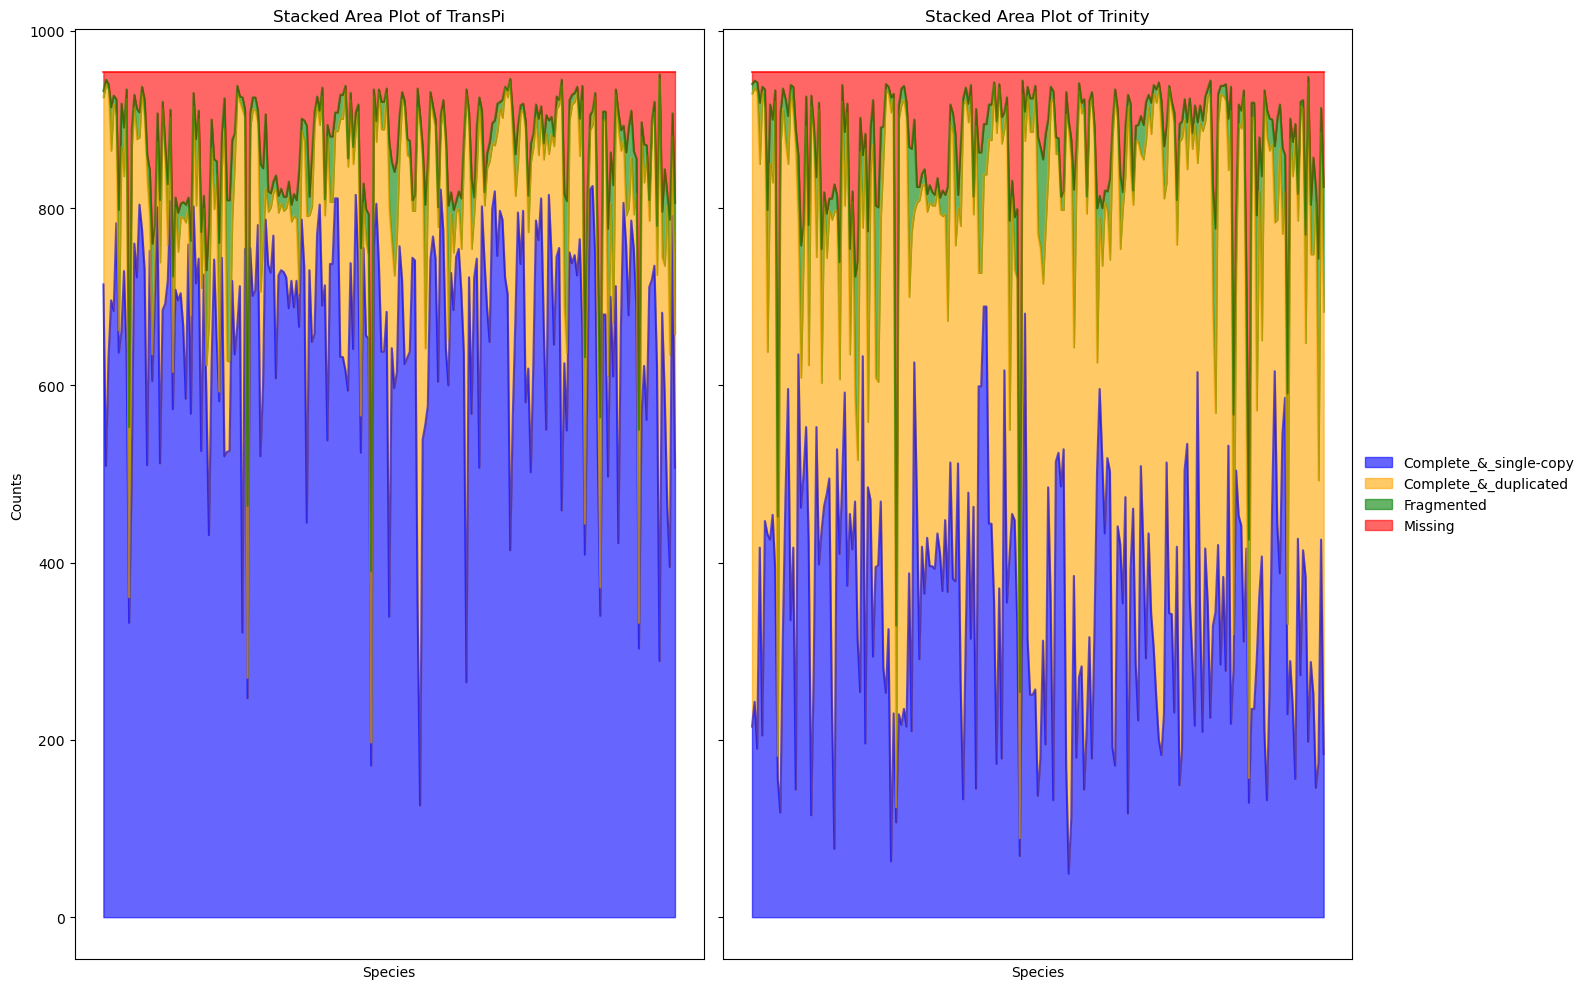

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# Plot the stacked area for the first DataFrame
TransPi_subset.plot(kind='area', stacked=True, color=colors, alpha=0.6, ax=axs[0])
axs[0].set_title('Stacked Area Plot of TransPi')
axs[0].set_xlabel('Species')
axs[0].set_ylabel('Counts')
axs[0].legend().set_visible(False) 
axs[0].set_xticks([])
axs[0].set_xticklabels([])

# Plot the stacked area for the second DataFrame
Trinity_subset.plot(kind='area', stacked=True, color=colors, alpha=0.6, ax=axs[1])
axs[1].set_title('Stacked Area Plot of Trinity')
axs[1].set_xlabel('Species')
axs[1].set_ylabel('Counts')
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).set_frame_on(False)
axs[1].set_xticks([])
axs[1].set_xticklabels([])

# Show the plots
plt.tight_layout()
plt.show()

# Data wrangling

In [7]:
all_column_values = []
column_names = []
for column_name in TransPi.columns:
    column_names.append(column_name)
    column_values = TransPi[column_name].tolist()
    all_column_values.append(column_values)
column_names.insert(0,'')
#print(column_names)
#print(all_column_values)
all_column_values_Trinity = []
column_names_Trinity = []
for column_name in Trinity.columns:
    column_names_Trinity.append(column_name)
    column_values = Trinity[column_name].tolist()
    all_column_values_Trinity.append(column_values)
column_names_Trinity.insert(0,'')
#print(column_names)

# TransPi Raincloud Plot 1

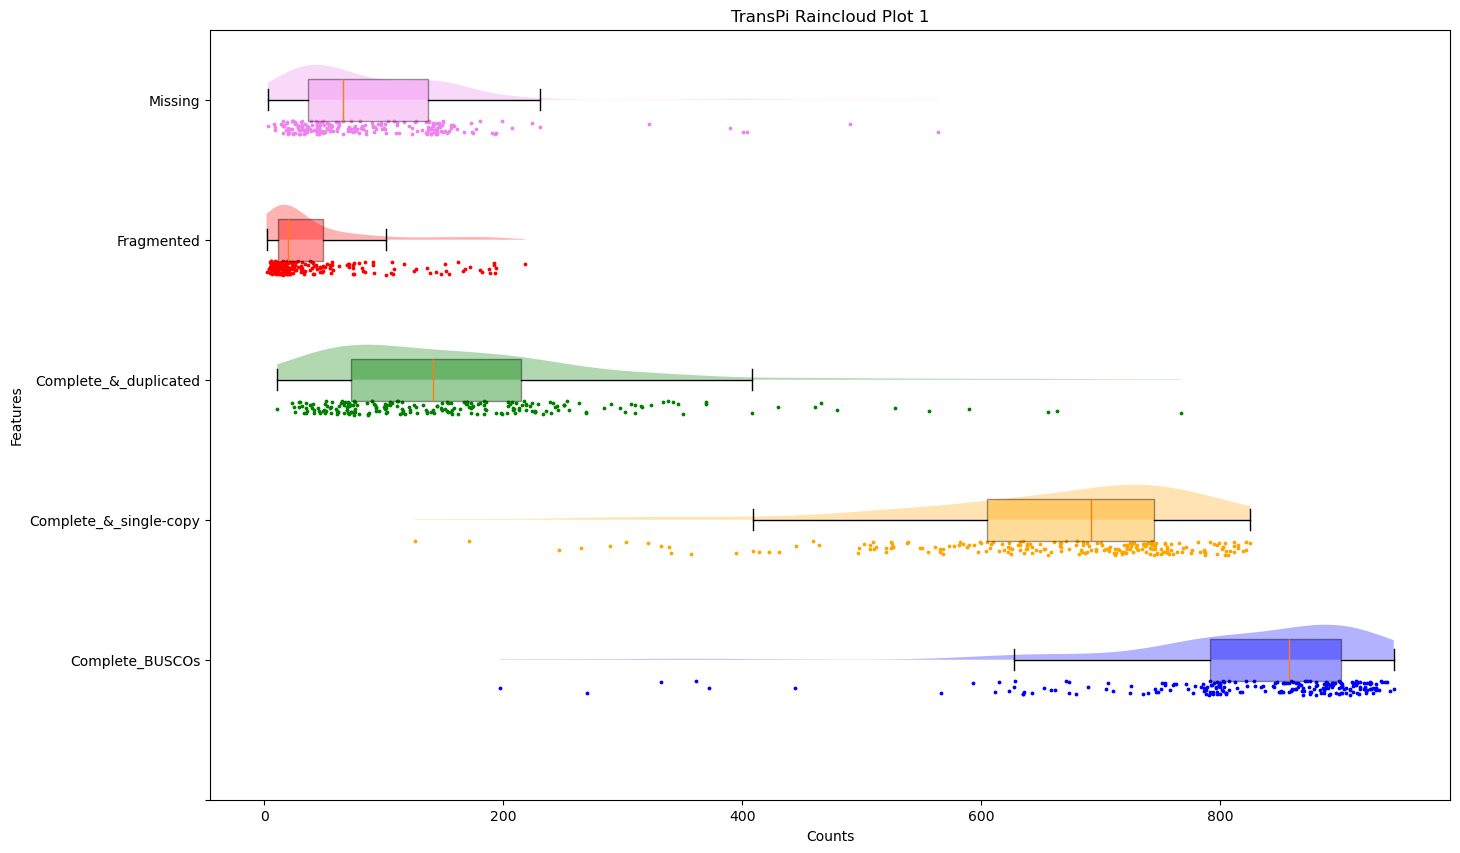

In [8]:
fig, ax = plt.subplots(figsize=(16, 10))
colors = ['blue', 'orange', 'green', 'red', 'violet']

vp = ax.violinplot(all_column_values, points=1000,
                  showmeans=False, showextrema=False, showmedians=False, vert=False)

# Adjust the positions of the violinplots
for idx, b in enumerate(vp['bodies']):
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx + 1, idx + 2)
    # Change to the desired color for the violinplot
    b.set_facecolor(colors[idx])

# Boxplot data
positions = np.arange(1, len(all_column_values) + 0.5)
bp = ax.boxplot(all_column_values, patch_artist=True, vert=False, positions=positions, showfliers=False, widths=0.3)

# Change to the desired color and add transparency for boxplot
for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.4) 

# Scatterplot data
for idx, features in enumerate(all_column_values):
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    if len(features) != len(y):
        print('ERROR')
    plt.scatter(features, y, s=3, c=colors[idx], label=column_names[idx])

plt.yticks(np.arange(len(column_names)), column_names)
plt.xlabel("Counts")
plt.ylabel("Features")
plt.title("TransPi Raincloud Plot 1")
#plt.legend()

plt.show()

# Trinity Raincloud Plot 1

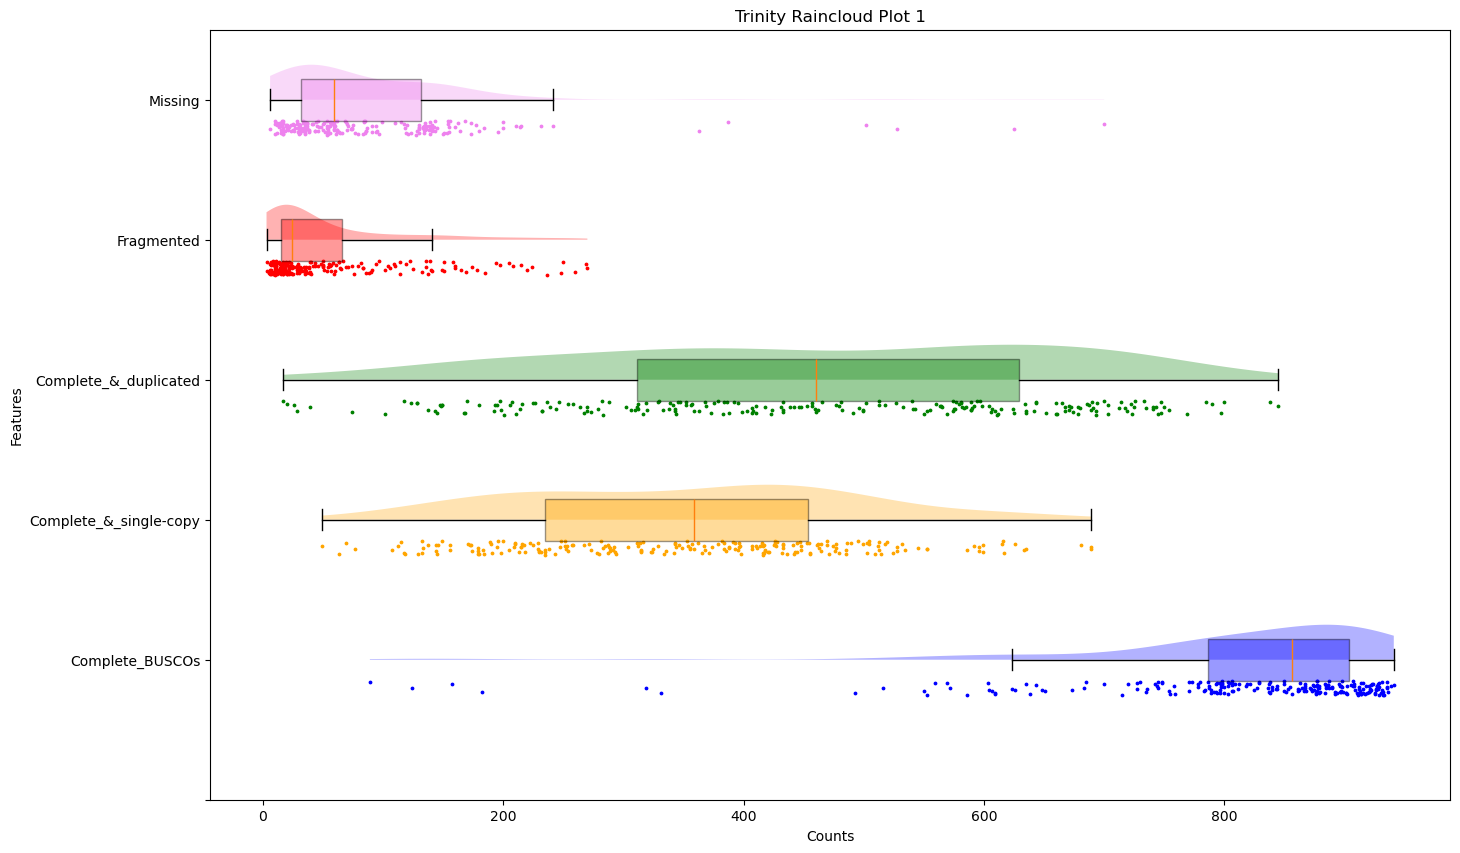

In [9]:
fig, ax = plt.subplots(figsize=(16, 10))
colors = ['blue', 'orange', 'green', 'red', 'violet']

vp = ax.violinplot(all_column_values_Trinity, points=1000,
                  showmeans=False, showextrema=False, showmedians=False, vert=False)

# Adjust the positions of the violinplots
for idx, b in enumerate(vp['bodies']):
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx + 1, idx + 2)
    # Change to the desired color for the violinplot
    b.set_facecolor(colors[idx])

# Boxplot data
positions = np.arange(1, len(all_column_values_Trinity) + 0.5)
bp = ax.boxplot(all_column_values_Trinity, patch_artist=True, vert=False, positions=positions, showfliers=False, widths=0.3)

# Change to the desired color and add transparency for boxplot
for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.4) 

# Scatterplot data
for idx, features in enumerate(all_column_values_Trinity):
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    if len(features) != len(y):
        print('ERROR')
    plt.scatter(features, y, s=3, c=colors[idx], label=column_names_Trinity[idx])

plt.yticks(np.arange(len(column_names_Trinity)), column_names_Trinity)
plt.xlabel("Counts")
plt.ylabel("Features")
plt.title("Trinity Raincloud Plot 1")
#plt.legend()

plt.show()

# TransPi Raincloud Plot 2

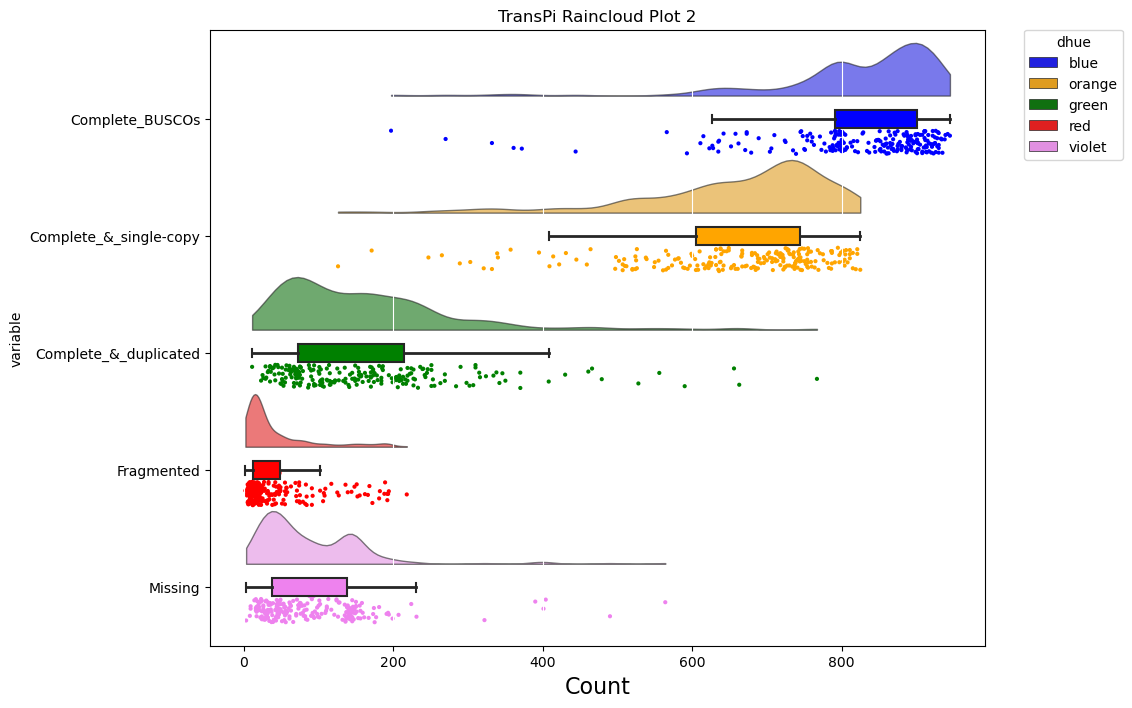

In [29]:
new_df = TransPi.melt(ignore_index=False)
#print(new_df)

def color_func(value):
    if value == 'Complete_BUSCOs':
        return 'blue'
    if value == 'Complete_&_single-copy':
        return 'orange'
    if value == 'Complete_&_duplicated':
        return 'green'
    if value == 'Fragmented':
        return 'red'
    else:
        return 'violet'

#add new col of color to df
new_df['dhue'] = new_df['variable'].apply(color_func)
#print(new_df)


import ptitprince as pt
dx = 'variable'
dy = 'value'
ort = "h"
pal = ['blue', 'orange', 'green', 'red', 'violet']
sigma = .2
f, ax = plt.subplots(figsize=(10, 8))

pt.RainCloud(x = dx, y = dy, data = new_df, palette = pal, bw = sigma, hue = 'dhue',
             orient = ort, move = .2, alpha = 0.6, ax= ax,
             width_viol = .9,
             box_showfliers = False,
             rain_edgecolor = 'gray')

plt.title("TransPi Raincloud Plot 2")
#plt.ylabel('', fontsize = 20) 
plt.xlabel('Count', fontsize = 16) 
plt.grid(color = 'w')
#citation
#Allen M, Poggiali D, Whitaker K et al. Raincloud plots: a multi-platform tool for robust data visualization [version 2; peer review: 2 approved]. Wellcome Open Res 2021, 4:63 (https://doi.org/10.12688/wellcomeopenres.15191.2)

# Trinity Raincloud Plot 2

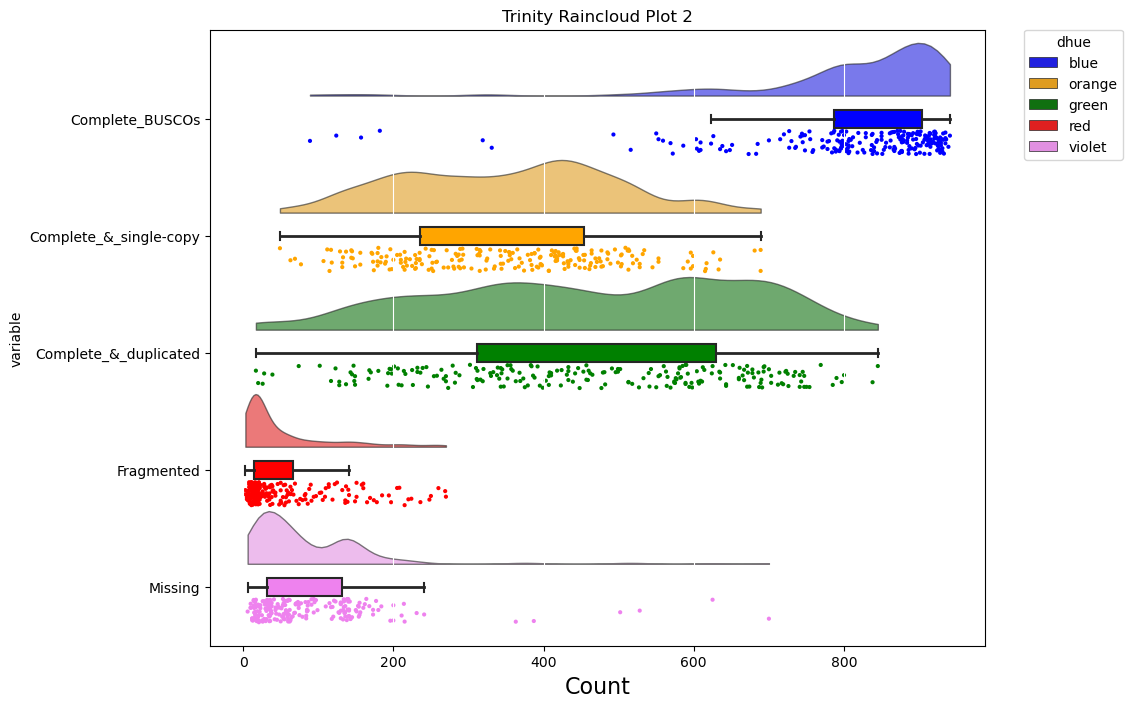

In [35]:
dx = 'variable'
dy = 'value'
ort = "h"
pal = ['blue', 'orange', 'green', 'red', 'violet']
sigma = .2
f, ax = plt.subplots(figsize=(10, 8))

pt.RainCloud(x = dx, y = dy, data = new_df_Trin, palette = pal, bw = sigma, hue = 'dhue',
             orient = ort, move = .2, alpha = 0.6, ax= ax,
             width_viol = .9,
             box_showfliers = False,
             rain_edgecolor = 'gray')

plt.title("Trinity Raincloud Plot 2")
#plt.ylabel('', fontsize = 20) 
plt.xlabel('Count', fontsize = 16) 
plt.grid(color = 'w')
#citation
#Allen M, Poggiali D, Whitaker K et al. Raincloud plots: a multi-platform tool for robust data visualization [version 2; peer review: 2 approved]. Wellcome Open Res 2021, 4:63 (https://doi.org/10.12688/wellcomeopenres.15191.2)

# Combined Raincloud Plot

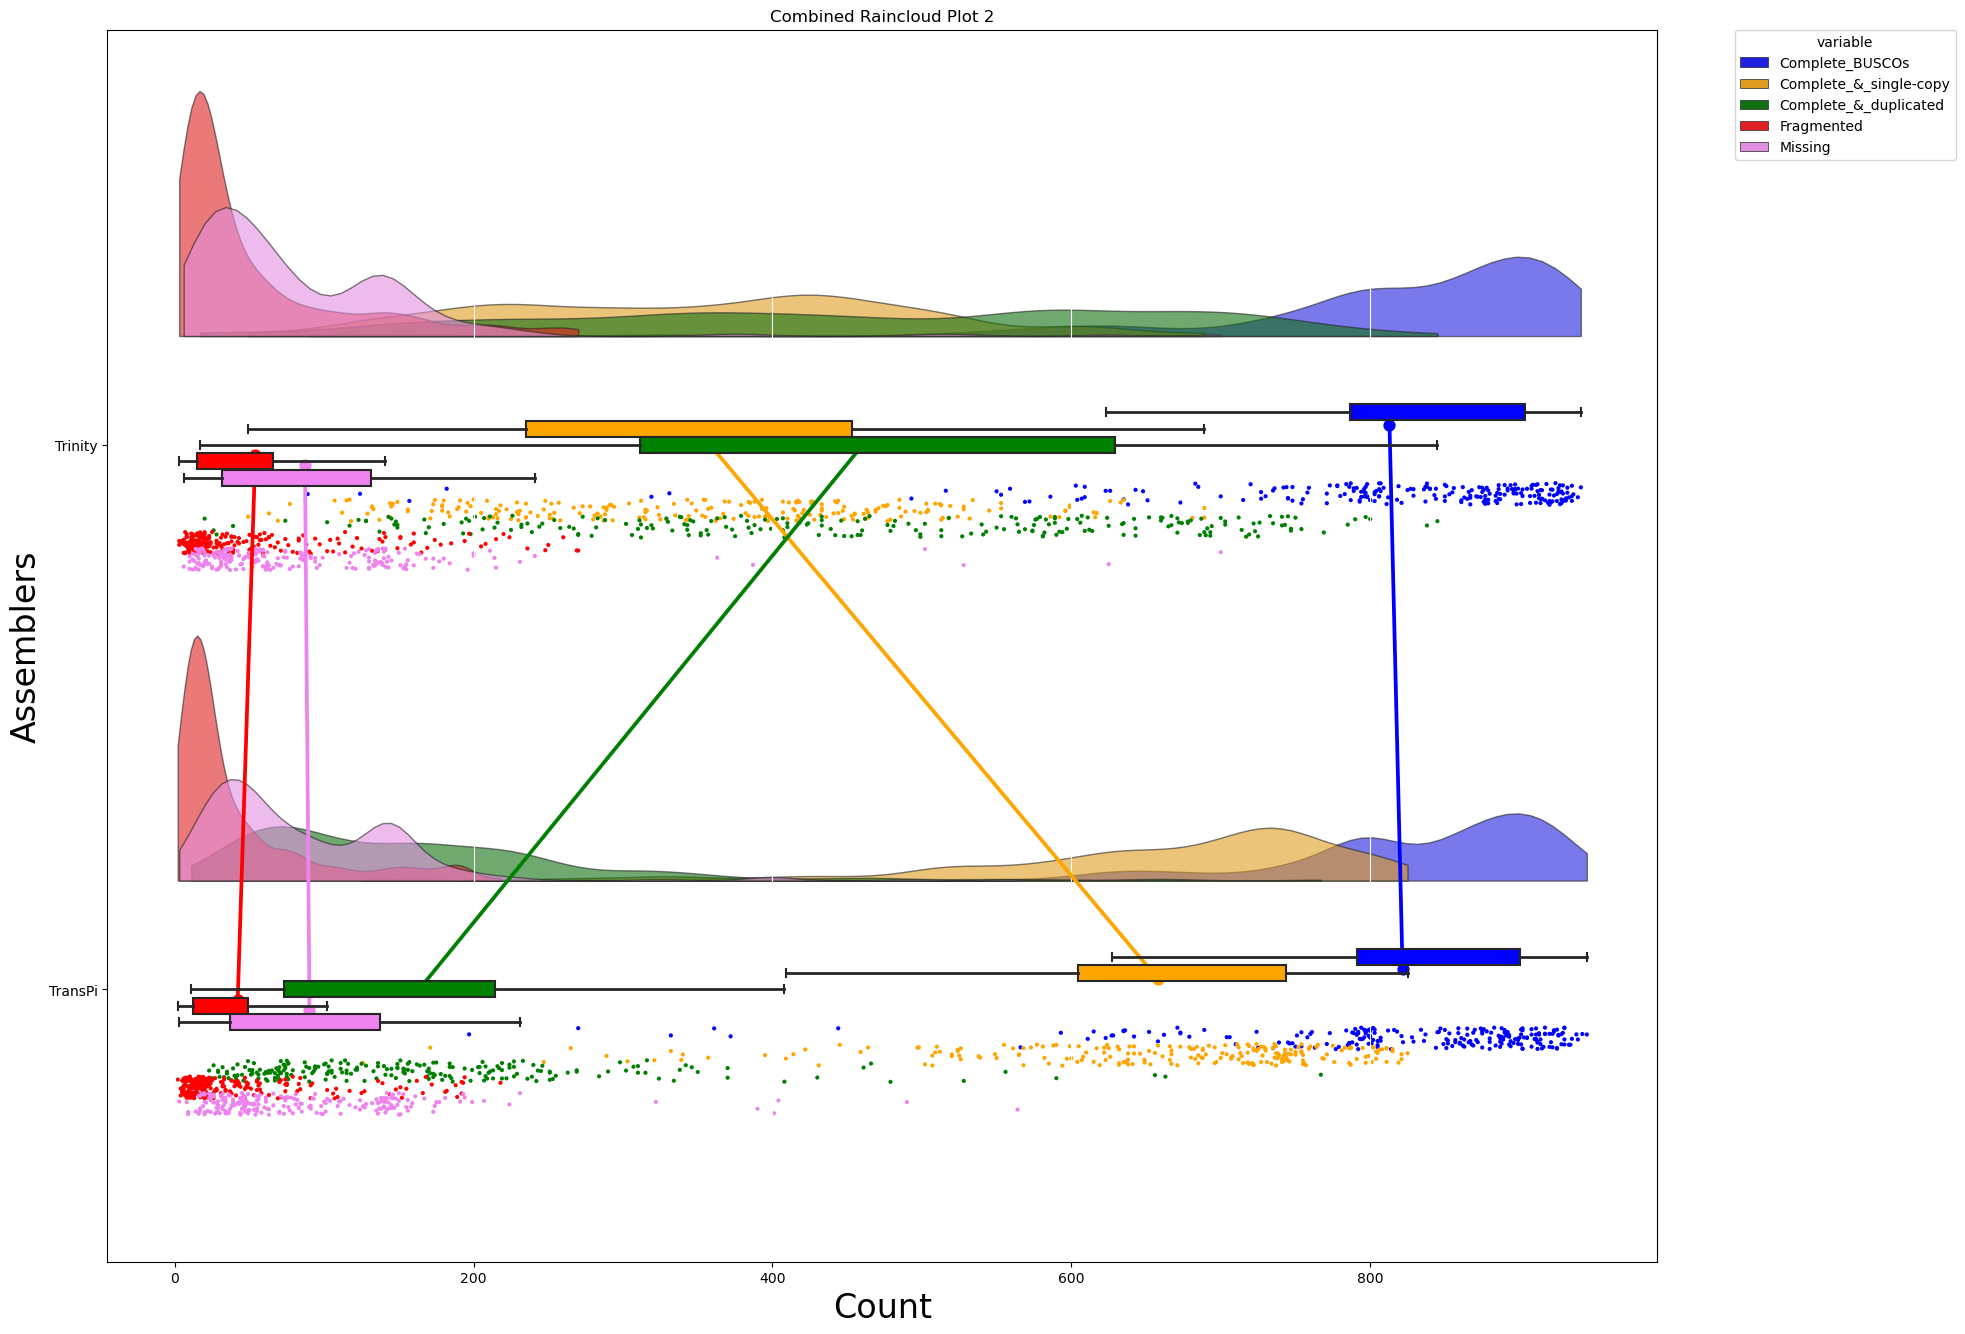

In [50]:
#print(new_df_Trin)
#print(new_df)
#merge into new df
new_df_Trin['Assembler'] = 'Trinity'
new_df['Assembler'] = 'TransPi'
merged_df = pd.concat([new_df_Trin, new_df])
#print(merged_df)

dx = 'Assembler'
dy = 'value'
ort = "h"
pal = ['blue', 'orange', 'green', 'red', 'violet']
sigma = .2
f, ax = plt.subplots(figsize=(20, 16))

pt.RainCloud(x = dx, y = dy, data = merged_df, palette = pal, bw = sigma, hue = 'variable',
             orient = ort, move = .15, alpha = 0.6, ax= ax, dodge = True, pointplot = True,
             width_viol = .9,
             box_showfliers = False,
             rain_edgecolor = 'gray')

plt.title("Combined Raincloud Plot 2")
plt.ylabel('Assemblers', fontsize = 24)
plt.xlabel('Count', fontsize = 24) 
plt.grid(color = 'w')